In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
# sns.set()

In [2]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'handwritten5.jpg', 'manan', 'manan.ipynb', 'nos.jpg', 'test.csv', 'train.csv', 'try.py', 'updated.png']


In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
X_train = train_data.iloc[:,1:].values
y_train = train_data.iloc[:,0].values

In [5]:
# print(pd.DataFrame(X_train).isna().sum())
# print(test_data.isna().sum())

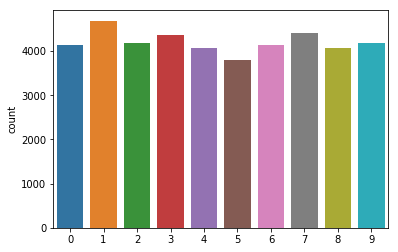

In [6]:
sns.countplot(y_train)

In [7]:
X_train = X_train/255.0
test_data = test_data/255.0

In [8]:
X_train = X_train.reshape(-1,28,28,1)
test_data = test_data.values.reshape(-1,28,28,1)

In [79]:
# for i in X_train:
#     cv2.imshow('img', i)
#     if cv2.waitKey(250):
#         cv2.destroyAllWindows()

KeyboardInterrupt: 

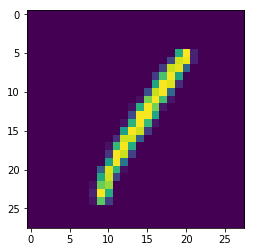

In [75]:
plt.imshow(X_train[11045].reshape(28, 28))
plt.show()

In [10]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train,num_classes=10)   

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) 

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=2)

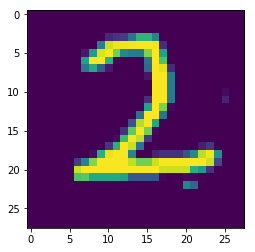

In [12]:
plt.imshow(X_train[108].reshape(28, 28))
plt.show()

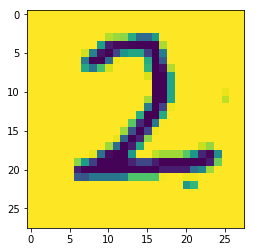

In [13]:
plt.imshow(1-X_train[108].reshape(28, 28))
plt.show()

In [14]:
 X_train2 = 1 - X_train
 X_test2 = 1 - X_test

In [15]:
 X_train = np.concatenate((X_train,X_train2),axis = 0)
 y_train = np.concatenate((y_train,y_train),axis=0)
 X_test = np.concatenate((X_test,X_test2),axis = 0)
 y_test =  np.concatenate((y_test,y_test),axis = 0)

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from joblib import dump, load
from sklearn.preprocessing import StandardScaler
# import numpy as np

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.convolutional import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten

In [413]:
classifier = Sequential()

classifier.add(Conv2D(filters = 32,kernel_size = (3, 3),input_shape = (28,28,1),activation = 'relu',padding='same'))

classifier.add(MaxPool2D((2,2)))


classifier.add(Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu',padding='same'))

classifier.add(MaxPool2D(2,2))

classifier.add(Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu',padding='same'))

classifier.add(MaxPool2D(2,2))

classifier.add(Flatten())

classifier.add(Dense(units = 64,activation='relu'))
classifier.add(Dense(units = 10,activation='softmax'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [414]:
# classifier = keras_model1(28, 28, 10)

In [415]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
__________

In [416]:
classifier.fit(X_train,y_train,batch_size = 100,epochs=10,validation_data=(X_test,y_test)) 

Train on 31500 samples, validate on 10500 samples
Epoch 1/10
31500/31500 [==============================] - 7s 232us/step - loss: 0.3389 - acc: 0.8950 - val_loss: 0.1139 - val_acc: 0.9651
Epoch 2/10
31500/31500 [==============================] - 7s 235us/step - loss: 0.0760 - acc: 0.9767 - val_loss: 0.0655 - val_acc: 0.9807
Epoch 3/10
31500/31500 [==============================] - 7s 212us/step - loss: 0.0512 - acc: 0.9845 - val_loss: 0.0549 - val_acc: 0.9827
Epoch 4/10
31500/31500 [==============================] - 7s 214us/step - loss: 0.0380 - acc: 0.9881 - val_loss: 0.0466 - val_acc: 0.9861
Epoch 5/10
31500/31500 [==============================] - 7s 209us/step - loss: 0.0309 - acc: 0.9900 - val_loss: 0.0436 - val_acc: 0.9860
Epoch 6/10
31500/31500 [==============================] - 7s 210us/step - loss: 0.0263 - acc: 0.9915 - val_loss: 0.0422 - val_acc: 0.9884
Epoch 7/10
31500/31500 [==============================] - 7s 208us/step - loss: 0.0212 - acc: 0.9934 - val_loss: 0.0372 - 

In [417]:
# def train_speedometer(x_train, y_train):
# #     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)
#     all=[]
#     for i in range(1, 10):
#         model = KNeighborsRegressor(n_neighbors=i)
#         print(model.fit(x_train, y_train))
#         print('train_scr: ',model.score(x_train, y_train))
#         scr=model.score(x_test, y_test)
#         print('test_scr: ', scr)
#         all.append(model)
#     return max(all)

In [418]:
X_train.shape

(31500, 28, 28, 1)

In [419]:
# classifier = train_speedometer(X_train.reshape(-1, 784), y_train)

In [420]:
# result = classifier.predict(test_data)

In [421]:
# results = np.argmax(result,axis = 1)

In [422]:
from PIL import Image
im = Image.open('handwritten5.jpg')
im = im.resize((28,28))
im.save('updated.png')

In [423]:
im = cv2.imread('updated.png', 0)/255.0
im2 = np.round(im, 0)
# for i in range(28):
#     for j in range(28):
#         im[i][j] = round(im[i][j],0) # only binary value why?
# cv2.imshow('image',im)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [424]:
# im2

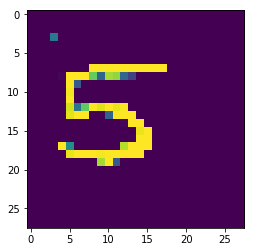

In [425]:
plt.imshow(1-im)
plt.show()

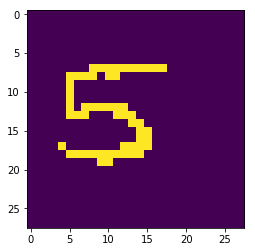

In [426]:
plt.imshow(1-im2)
plt.show()

In [427]:
OP = classifier.predict(1-im2.reshape(1, 28, 28, 1))
op = np.argmax(OP,axis = 1)
print(OP, op)

[[1.4020961e-08 3.7613571e-10 1.5800133e-06 4.5856861e-05 7.5294828e-09
  9.9767357e-01 2.4674197e-08 2.0114954e-03 9.1634420e-06 2.5834332e-04]] [5]


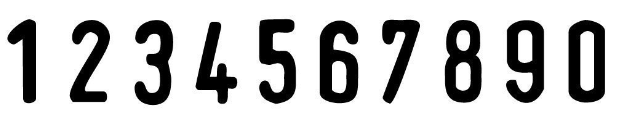

In [428]:
im = Image.open('nos.jpg')
im

In [429]:
np.array(im).shape

(125, 624, 4)

In [430]:
im = im.resize((560,56))
im.save('updated.png')

In [431]:
im = cv2.imread('updated.png',0)/255.0
# im = Image.open('updated.png')
# im

In [432]:
im.shape

(56, 560)

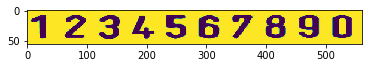

In [433]:
plt.imshow(im)
plt.show()

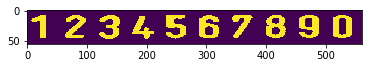

In [434]:
im2 = np.round(im, 0)
plt.imshow(1-im2)
plt.show()

In [435]:
list_im = []
imlist = []

In [436]:
for j in range(560):
    if np.all(im[:,j] == 1):
        list_im.append(j)

if 0 in list_im:  
    list_im.remove(0)  
    list_im.insert(0,1)
    
if 559 in list_im:
    list_im.remove(559)     

k=140
while k:
    for j in list_im:
        if np.all(im[:,j-1] == 1) and np.all(im[:,j+1]==1):
            list_im.remove(j)
    k=k-1

imlist = [0,]


for i in range(len(list_im)):
    if i==19:
        break

    if i%2 != 0:
        imlist.append(int((list_im[i] + list_im[i+1])/2))

list_im = []
imlist.append(559)

In [437]:
for j in range(len(imlist)):
    if j==10:
        break        
    img = im[:,imlist[j]:imlist[j+1]]
    list_im.append(img)

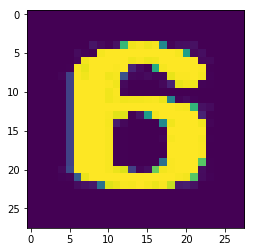

In [438]:
t=Image.fromarray(list_im[5]).resize((28, 28))
t=np.array(t)
plt.imshow(1-t)
plt.show()

In [439]:
x=np.zeros( (len(list_im), 28, 28, 1) )

In [440]:
PhoneNo = []
for i in range(len(list_im)):              
    img = Image.fromarray(list_im[i])   
    img = img.resize((28,28))
    img = np.array(img)
    img = img.reshape(1, 28,28,1)
    x[i, :, :] = 1-img
OP = classifier.predict(x)  
op = np.argmax(OP,axis = 1)    
# PhoneNo=op

In [441]:
OP[5]

array([3.2436976e-05, 1.3475438e-16, 6.9458660e-14, 4.2622450e-08,
       4.5696506e-16, 9.9868625e-01, 1.2811814e-03, 4.4782181e-11,
       5.5838814e-08, 1.0692574e-08], dtype=float32)

In [442]:
op

array([3, 2, 3, 6, 5, 5, 7, 8, 9, 0], dtype=int64)

In [443]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.externals import joblib 

In [444]:
# joblib.dump(classifier, )

In [445]:
# classifier = joblib.load('accu_90p.model')

In [446]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(classifier.predict(X_test), axis=1)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1030
           1       1.00      0.99      0.99      1224
           2       0.99      0.99      0.99      1031
           3       0.99      0.99      0.99      1076
           4       1.00      0.99      0.99      1053
           5       0.98      1.00      0.99       934
           6       1.00      0.99      0.99      1029
           7       0.97      1.00      0.99      1089
           8       0.99      0.98      0.99       989
           9       0.98      0.98      0.98      1045

   micro avg       0.99      0.99      0.99     10500
   macro avg       0.99      0.99      0.99     10500
weighted avg       0.99      0.99      0.99     10500



In [447]:
print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(classifier.predict(X_test), axis=1)))

[[1027    0    0    0    0    0    1    0    0    2]
 [   0 1217    0    2    0    0    0    4    1    0]
 [   0    1 1016    3    0    0    0    5    2    4]
 [   0    0    2 1065    0    4    0    2    1    2]
 [   1    1    0    0 1045    0    1    0    0    5]
 [   1    0    0    1    0  930    0    1    1    0]
 [   3    1    0    1    0    6 1017    0    1    0]
 [   0    1    2    0    0    0    0 1085    0    1]
 [   1    1    2    3    0    7    0    2  967    6]
 [   2    1    0    0    5    1    0   15    1 1020]]


In [448]:
ones_filter = np.where(np.argmax(y_test, axis=1)==1)[0]

In [449]:
ones_filter.shape

(1224,)

In [450]:
ones = X_test[ones_filter]

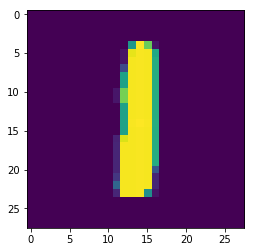

In [451]:
plt.imshow(ones[12].reshape(28, 28))
plt.show()